In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('data/SSN/sunspot_data.csv')

df["Number of Sunspots"].replace(-1, np.nan, inplace=True)
df["Number of Sunspots"].replace(0, np.nan, inplace=True)

ssn_df = df.dropna()

t = ssn_df['Year']

d = np.log10(ssn_df['Number of Sunspots'])
d -= np.nanmean(d)
d /= np.std(d)

In [49]:
t = np.array(t[::100])
d = np.array(d[::100])

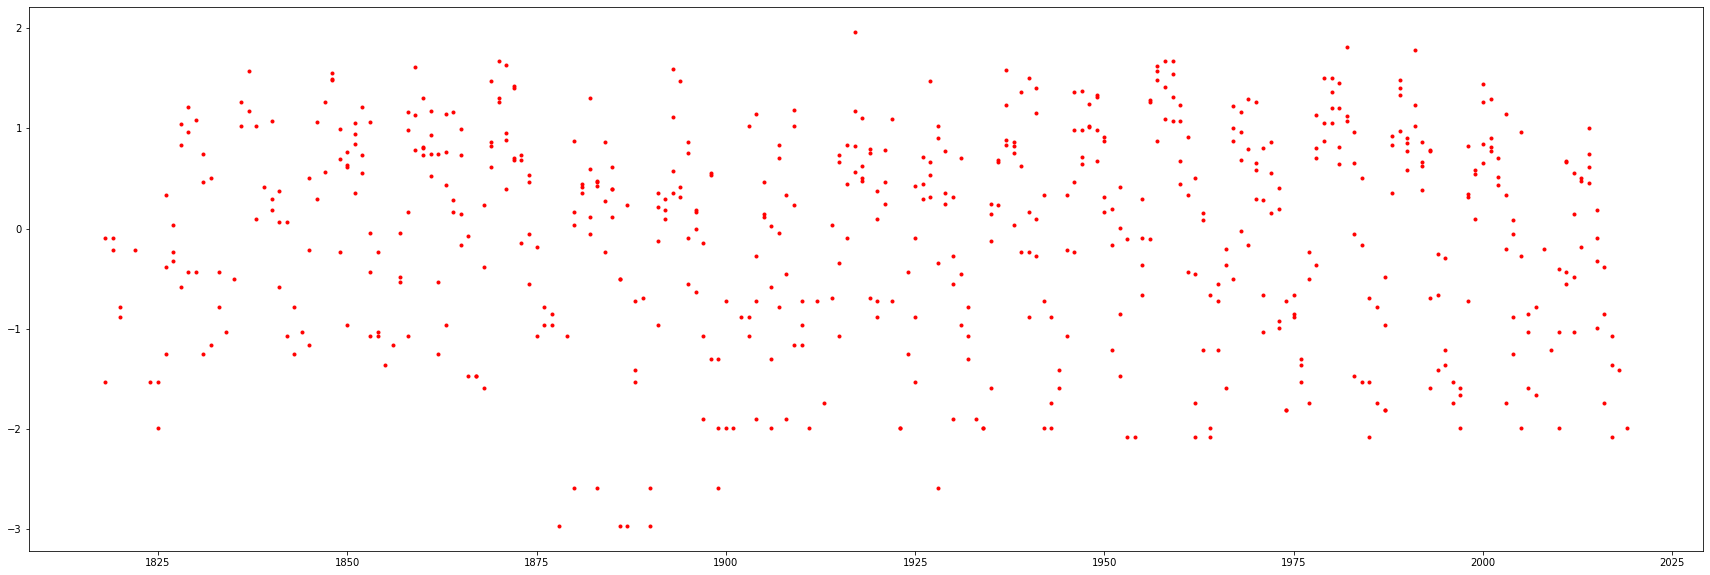

In [50]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(t, d,'r.')

ax.title.set_fontsize(20)

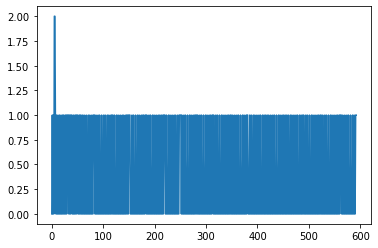

In [69]:
plt.plot(np.diff(t))

In [66]:

def compute_K_QP(X1, X2, theta, **kwargs):
    '''
    Quasi-periodic GP covariance kernel
    '''

    # Calculate Euclidean distance via ufunc outer product.
    tau = np.subtract.outer(X1,X2)

    # Extract hyper-parameters
    h, P, lambda_p, lambda_e = theta[0:4]
    
    # Calculate covariance matrix
    K_QP = (h**2)*np.exp(-((np.sin(np.pi*tau/P)**2)/(lambda_p**2)
         + (tau/lambda_e)**2)/2 )
    
    return K_QP


def compute_K_WN(X1, X2, sig_obs, add_sig_obs=True):
    ''' White noise kernel '''
    
    K_WN = np.zeros((len(X1),len(X2)))
    
    # Add white noise to covariance matrix
    if add_sig_obs:
        np.fill_diagonal(K_WN, K_WN.diagonal() + sig_obs**2)

    return K_WN

theta = [1, 25, 1, 100]

K = compute_K_QP(t, t, theta) + compute_K_WN(t,t, 1)


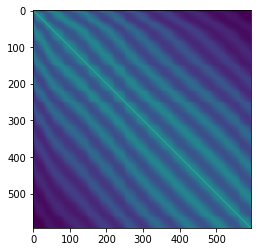

In [67]:
plt.imshow(K)

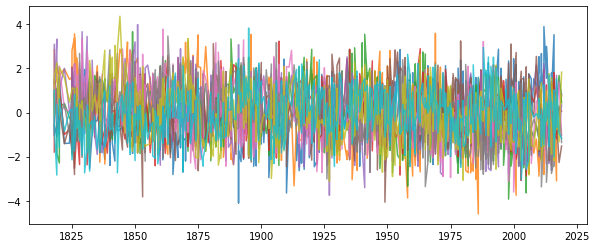

In [68]:
GP_sample = np.random.multivariate_normal


plt.figure(figsize=(10,4))
for i in range(10):
    sample = GP_sample(np.zeros(len(t)), K)
    plt.plot(t, sample-np.mean(sample), alpha=0.8)
        

In [ ]:
def logL_GP(residuals, K):
    '''  
    Gaussian process log likelihood (residuals := y - mean)
    '''  
    
    logL = -0.5*(np.linalg.slogdet(K)[1] 
            + residuals.T@np.linalg.inv(K)@residuals
            + len(residuals)*np.log(2*np.pi))
              
    return logL